In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("C:/Users/MYCOM/data/schoolattack.xlsx")

## K-MODES 클러스터링

In [13]:
data['학교급'].value_counts()

중학교     102554
초등학교     95033
고등학교     60164
유치원      24397
특수학교      1291
기타학교       987
Name: 학교급, dtype: int64

In [14]:
data=data[data['학교급']!='유치원']
data=data[data['학교급']!='특수학교']
data=data[data['학교급']!='기타학교']

In [15]:
data['학교급'].value_counts()

중학교     102554
초등학교     95033
고등학교     60164
Name: 학교급, dtype: int64

In [16]:
data[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']]

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
0,특별활동,교실,기타,기타,실험실습
1,체육수업,운동장,넘어짐,운동/놀이,구기운동
2,학교행사,교외활동,넘어짐,기타,기타운동
3,체육수업,부속시설,물리적힘 노출,운동/놀이,구기운동
4,학교행사,운동장,미끄러짐,건물,장난/놀이
...,...,...,...,...,...
284421,체육수업,부속시설,넘어짐,자연,구기운동
284422,학교행사,운동장,물리적힘 노출,운동/놀이,기타
284423,점심시간,운동장,미끄러짐,건물,보행/주행
284424,등하교,운동장,미끄러짐,건물,보행/주행


In [17]:
def convert_categorical_to_integer(df):
    df_copy = df.copy()
    for column in df_copy.columns:
        if df_copy[column].dtype == 'object':
            # Convert the categorical column to integers using factorize
            df_copy[column] = pd.factorize(df_copy[column])[0]
    
    return df_copy

In [18]:
data_km=data[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']]
data_kmn=convert_categorical_to_integer(data_km)

In [19]:
data_kmn.head(10)

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
0,0,0,0,0,0
1,1,1,1,1,1
2,2,2,1,0,2
3,1,3,2,1,1
4,2,1,3,2,3
5,3,0,2,2,4
6,4,1,2,3,3
7,1,1,3,1,1
8,4,3,2,1,1
9,0,3,3,2,4


In [20]:
data_km.head(10)

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
0,특별활동,교실,기타,기타,실험실습
1,체육수업,운동장,넘어짐,운동/놀이,구기운동
2,학교행사,교외활동,넘어짐,기타,기타운동
3,체육수업,부속시설,물리적힘 노출,운동/놀이,구기운동
4,학교행사,운동장,미끄러짐,건물,장난/놀이
5,점심시간,교실,물리적힘 노출,건물,보행/주행
6,휴식시간 및 청소시간,운동장,물리적힘 노출,가구,장난/놀이
7,체육수업,운동장,미끄러짐,운동/놀이,구기운동
8,휴식시간 및 청소시간,부속시설,물리적힘 노출,운동/놀이,구기운동
9,특별활동,부속시설,미끄러짐,건물,보행/주행


In [21]:
from kmodes.kmodes import KModes
kmodes = KModes(n_clusters=5) ## 클래스 초기화
kmodes.fit(data_kmn) ## 클러스터링 수행
print(kmodes.predict(data_kmn))

[3 0 3 ... 1 2 2]


In [22]:
data_kmn['클러스터']=kmodes.predict(data_kmn)

# 여기서부터 시작하기


In [12]:
import pandas as pd

In [13]:
data_kmn=pd.read_csv("C:/Users/MYCOM/data/schoolattack_clustering.csv")
data_km=pd.read_csv("C:/Users/MYCOM/data/schoolattack_cluster_f.csv")

In [14]:
data_km.head(10)

,Unnamed: 0,사고시간,사고장소,사고형태,사고매개물,사고당시활동,클러스터
0,0,특별활동,교실,기타,기타,실험실습,3
1,1,체육수업,운동장,넘어짐,운동/놀이,구기운동,0
2,2,학교행사,교외활동,넘어짐,기타,기타운동,3
3,3,체육수업,부속시설,물리적힘 노출,운동/놀이,구기운동,0
4,4,학교행사,운동장,미끄러짐,건물,장난/놀이,2
5,5,점심시간,교실,물리적힘 노출,건물,보행/주행,1
6,6,휴식시간 및 청소시간,운동장,물리적힘 노출,가구,장난/놀이,0
7,7,체육수업,운동장,미끄러짐,운동/놀이,구기운동,0
8,8,휴식시간 및 청소시간,부속시설,물리적힘 노출,운동/놀이,구기운동,0
9,9,특별활동,부속시설,미끄러짐,건물,보행/주행,2


In [15]:
data_kmn.head()

,Unnamed: 0,사고시간,사고장소,사고형태,사고매개물,사고당시활동,클러스터
0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0
2,2,2,2,1,0,2,3
3,3,1,3,2,1,1,0
4,4,2,1,3,2,3,2


In [16]:

#아닐 수도 
#head() 결과 보고 결정하기

data_km.drop('Unnamed: 0',axis=1,inplace=True)
data_kmn.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
data_km.head()

,사고시간,사고장소,사고형태,사고매개물,사고당시활동,클러스터
0,특별활동,교실,기타,기타,실험실습,3
1,체육수업,운동장,넘어짐,운동/놀이,구기운동,0
2,학교행사,교외활동,넘어짐,기타,기타운동,3
3,체육수업,부속시설,물리적힘 노출,운동/놀이,구기운동,0
4,학교행사,운동장,미끄러짐,건물,장난/놀이,2


In [18]:
data_kmn.head()

,사고시간,사고장소,사고형태,사고매개물,사고당시활동,클러스터
0,0,0,0,0,0,3
1,1,1,1,1,1,0
2,2,2,1,0,2,3
3,1,3,2,1,1,0
4,2,1,3,2,3,2


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

data_pca = pca.fit_transform(data_kmn[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']])

In [44]:
data_pca.shape

(257751, 2)

In [51]:
from kmodes.kmodes import KModes
n_clusters = 4  # 클러스터 개수를 설정한다
km = KModes(n_clusters=n_clusters, init='Huang', n_init=10, verbose=1)

# 클러스터링을 수행한다
clusters = km.fit_predict(data_kmn[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75647, cost: 558760.0
Run 1, iteration: 2/100, moves: 16290, cost: 554920.0
Run 1, iteration: 3/100, moves: 916, cost: 554920.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 65290, cost: 546197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 53420, cost: 496319.0
Run 3, iteration: 2/100, moves: 7061, cost: 496319.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 40181, cost: 618781.0
Run 4, iteration: 2/100, moves: 24753, cost: 610044.0
Run 4, iteration: 3/100, moves: 25204, cost: 596185.0
Run 4, iteration: 4/100, moves: 110, cost: 596185.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 57874, cost: 550899.0
Run 5, iter

C:\Users\MYCOM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


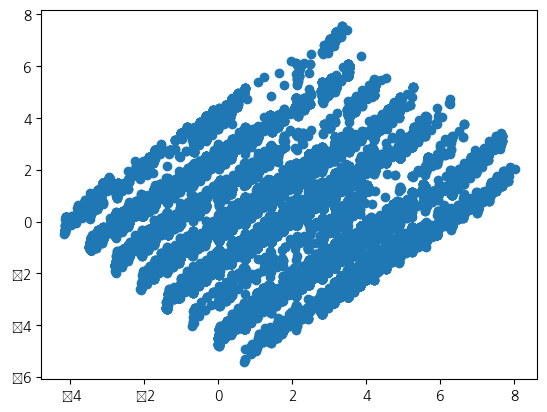

In [52]:
plt.scatter(data_pca[:,0],data_pca[:,1])

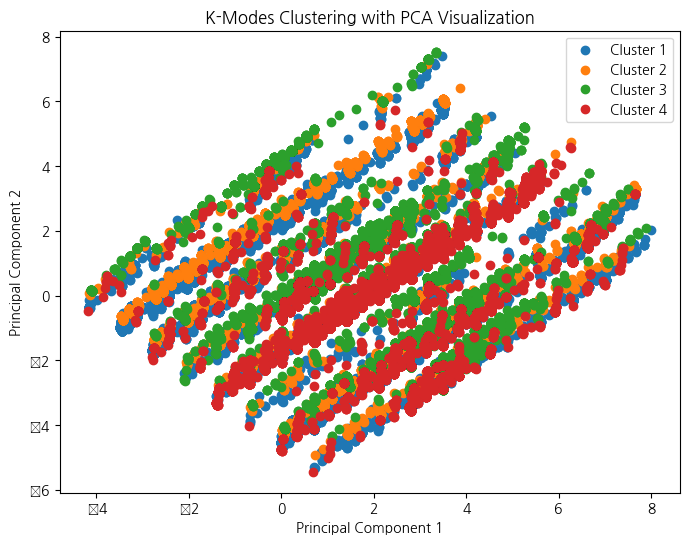

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
n_clusters=4
for cluster_num in range(n_clusters):
    plt.scatter(data_pca[clusters == cluster_num, 0], data_pca[clusters== cluster_num, 1], label=f'Cluster {cluster_num + 1}')

plt.title('K-Modes Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [10]:
data_kmn['클러스터']==data_km['클러스터']

0         True
1         True
2         True
3         True
4         True
          ... 
257746    True
257747    True
257748    True
257749    True
257750    True
Name: 클러스터, Length: 257751, dtype: bool

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(data_kmn[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']], data_km['클러스터'])

0.011310121050318936

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    
    fig, ax = plt.subplots(1, 1)
    y_lower = 10
    
    for i in range(max(clusters)+1):
        cluster_i = silhouette_vals[clusters == i]
        cluster_i.sort()
        y_upper = y_lower + cluster_i.shape[0]
        
        color = sns.color_palette('Set2')[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * cluster_i.shape[0], str(i))
        y_lower = y_upper + 10
    
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1])
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster label")
    
    # 수정된 부분: silhouette_avg 계산
    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title("Silhouette plot for the various clusters")
    
    plt.show()


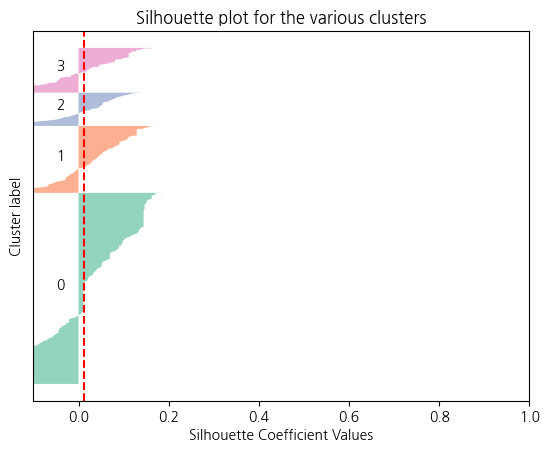

In [60]:
plot_silhouette(data_kmn[['사고시간','사고장소','사고형태','사고매개물','사고당시활동']], data_km['클러스터'])

In [24]:
data_km[data_kmn['클러스터']==0]['사고당시활동'].value_counts()

구기운동        88183
기타          19357
장난/놀이       11154
기타운동         8353
실험실습         4170
공부           3143
식사/수면/휴식     2932
보행/주행        1924
Name: 사고당시활동, dtype: int64

In [25]:
data_km[data_kmn['클러스터']==4]['사고당시활동'].value_counts()

보행/주행       5056
기타          2302
장난/놀이       1208
기타운동        1098
구기운동         830
식사/수면/휴식     780
공부           293
실험실습         129
Name: 사고당시활동, dtype: int64

In [26]:
data_km[data_kmn['클러스터']==1]

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
13,휴식시간 및 청소시간,교실,사람과의 충돌,자연,장난/놀이
32,휴식시간 및 청소시간,통로,넘어짐,건물,장난/놀이
33,점심시간,통로,물리적힘 노출,건물,보행/주행
34,휴식시간 및 청소시간,통로,넘어짐,건물,보행/주행
35,등하교,운동장,넘어짐,기타,보행/주행
...,...,...,...,...,...
284409,점심시간,운동장,넘어짐,자연,장난/놀이
284412,점심시간,통로,미끄러짐,건물,보행/주행
284417,점심시간,통로,물리적힘 노출,건물,장난/놀이
284418,점심시간,통로,넘어짐,자연,장난/놀이


In [27]:
data_km[data_kmn['클러스터']==1]['사고시간'].value_counts()

점심시간           22879
휴식시간 및 청소시간    12273
등하교             9070
수업시간            4614
학교행사            2025
기타              1226
특별활동            1109
체육수업             474
석식시간             240
기숙사생활            127
Name: 사고시간, dtype: int64

In [28]:
data_km[data_kmn['클러스터']==2]

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
4,학교행사,운동장,미끄러짐,건물,장난/놀이
9,특별활동,부속시설,미끄러짐,건물,보행/주행
10,휴식시간 및 청소시간,교실,물리적힘 노출,건물,장난/놀이
25,학교행사,부속시설,넘어짐,건물,기타운동
27,수업시간,부속시설,미끄러짐,건물,보행/주행
...,...,...,...,...,...
284397,체육수업,부속시설,떨어짐,건물,구기운동
284402,휴식시간 및 청소시간,교실,물리적힘 노출,건물,장난/놀이
284419,휴식시간 및 청소시간,운동장,미끄러짐,자연,장난/놀이
284424,등하교,운동장,미끄러짐,건물,보행/주행


# 클러스터 4개로

In [29]:
data_kmn.drop('클러스터',axis=1,inplace=True)
data_kmn.head()

,사고시간,사고장소,사고형태,사고매개물,사고당시활동
0,0,0,0,0,0
1,1,1,1,1,1
2,2,2,1,0,2
3,1,3,2,1,1
4,2,1,3,2,3


In [30]:
from kmodes.kmodes import KModes
kmodes = KModes(n_clusters=4) ## 클래스 초기화
kmodes.fit(data_kmn) ## 클러스터링 수행
data_kmn['클러스터']=kmodes.predict(data_kmn)

In [31]:
data_kmn.head()

,사고시간,사고장소,사고형태,사고매개물,사고당시활동,클러스터
0,0,0,0,0,0,3
1,1,1,1,1,1,0
2,2,2,1,0,2,3
3,1,3,2,1,1,0
4,2,1,3,2,3,2


In [32]:
data_kmn['클러스터'].value_counts()

0    146593
1     51340
3     34302
2     25516
Name: 클러스터, dtype: int64

In [33]:
data_kmn.to_csv("C:/Users/MYCOM/data/schoolattack_clustering.csv")

PermissionError: [Errno 13] Permission denied: 'C:/Users/MYCOM/data/schoolattack_clustering.csv'

In [ ]:
data_kmn

In [ ]:
data_kmn.info()

In [ ]:
data_kmn['클러스터']=data_kmn['클러스터'].astype('str')

In [ ]:
data_kmn.info()

In [ ]:
data_kmn['사고시간']=data_kmn['사고시간'].astype('str')
data_kmn['사고장소']=data_kmn['사고장소'].astype('str')
data_kmn['사고매개물']=data_kmn['사고매개물'].astype('str')
data_kmn['사고당시활동']=data_kmn['사고당시활동'].astype('str')

In [ ]:
data_kmn['사고형태']=data_kmn['사고형태'].astype('str')

In [ ]:
data_kmn.info()

In [ ]:
sns.hist

In [ ]:
all_features=data_kmn.columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='클러스터',hue=col, data = data_kmn)
    plt.show()

In [ ]:
data_km=pd.concat([data_km,data_kmn['클러스터']],axis=1)
data_km

In [ ]:
data_km.head()

In [ ]:
all_features=data_kmn.columns
import matplotlib.pyplot as plt
import seaborn as sns
for col in all_features:
    plt.subplots(figsize = (8,5))
    sns.countplot(x='클러스터',hue=col, data = data_km)
    plt.show()

In [ ]:
data_km[data_kmn['클러스터']==3]['사고당시활동'].value_counts()

In [ ]:
data_km.head()

In [ ]:
all_features=data_kmn.columns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data_kmn)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data =data_km)
    plt.show()


In [ ]:
data_km[data_kmn['클러스터']==3]['사고형태'].value_counts()

In [ ]:
data[data['설립유형']=='공립'].count()#225797
#4706434
print(225797/4706434)

In [ ]:
data[data['설립유형']=='공립'].count()

In [ ]:
data[data['설립유형']=='국립'].count()

In [ ]:
data[data['설립유형']=='사립'].count()#56623
#1222592
print(56623/1222592)